# Sales Forecasting - Overview of Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shutil

#### Unpack Data

In [2]:
plots = './Plots'
data = './Data'
zip_file = data + '/demand-forecasting-kernels-only.zip'
shutil.unpack_archive(zip_file, data)

train = data + '/train.csv'
train = pd.read_csv(train)
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')

In [3]:
train

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
print('Unique Stores:', train.store.unique())
print('\nUnique Items', train.item.unique())
print('\nData from', train.date.min(), 'until', train.date.max())

Unique Stores: [ 1  2  3  4  5  6  7  8  9 10]

Unique Items [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]

Data from 2013-01-01 00:00:00 until 2017-12-31 00:00:00


## Specific Sales per Store per Item

In [5]:
def get_sales_per_store_item(store, item):
    train_ = train.groupby(['store', 'item'])
    sales_per_store_item = train_.get_group((store, item))
    return sales_per_store_item

In [6]:
test1 = get_sales_per_store_item(1,2)
test2 = get_sales_per_store_item(2,2)

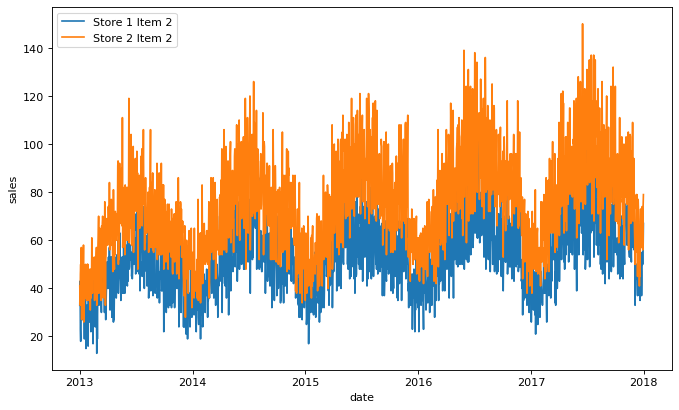

In [7]:
fig = plt.figure(figsize=(10, 6), dpi=80)
sns.lineplot(data=test1, x=test1.date, y=test1.sales)
sns.lineplot(data=test2, x=test2.date, y=test2.sales)
plt.legend(labels=['Store 1 Item 2','Store 2 Item 2'])
plt.show()
fig.savefig(plots+'/sales_per_store_per_item.png', dpi=fig.dpi)

## Overall Sales
Visualize summed sales over all stores and items

In [8]:
daily_sales = train.groupby('date', as_index=False)['sales'].sum()
daily_sales

,date,sales
0,2013-01-01,13696
1,2013-01-02,13678
2,2013-01-03,14488
3,2013-01-04,15677
4,2013-01-05,16237
...,...,...
1821,2017-12-27,20378
1822,2017-12-28,21885
1823,2017-12-29,23535
1824,2017-12-30,24988


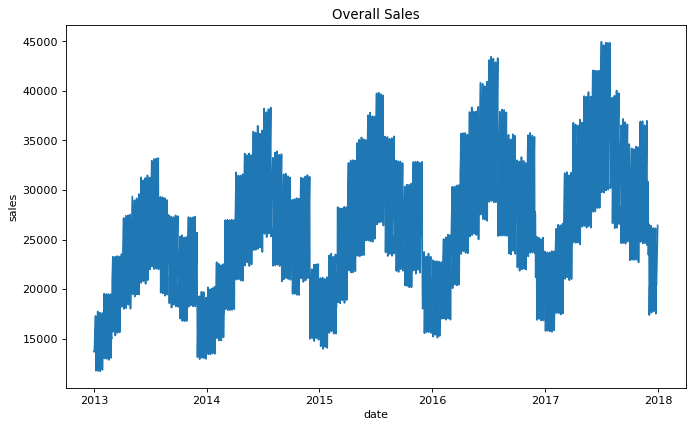

In [9]:
fig = plt.figure(figsize=(10, 6), dpi=80)
sns.lineplot(data=daily_sales, x=daily_sales.date, y=daily_sales.sales)
plt.title('Overall Sales')
plt.show()
fig.savefig(plots+'/sales_overall.png', dpi=fig.dpi)

## Store Specific Sales

In [10]:
store_sales = train.groupby(['store', 'date'], as_index=False)['sales'].sum()
store_sales

,store,date,sales
0,1,2013-01-01,1316
1,1,2013-01-02,1264
2,1,2013-01-03,1305
3,1,2013-01-04,1452
4,1,2013-01-05,1499
...,...,...,...
18255,10,2017-12-27,2221
18256,10,2017-12-28,2429
18257,10,2017-12-29,2687
18258,10,2017-12-30,2742


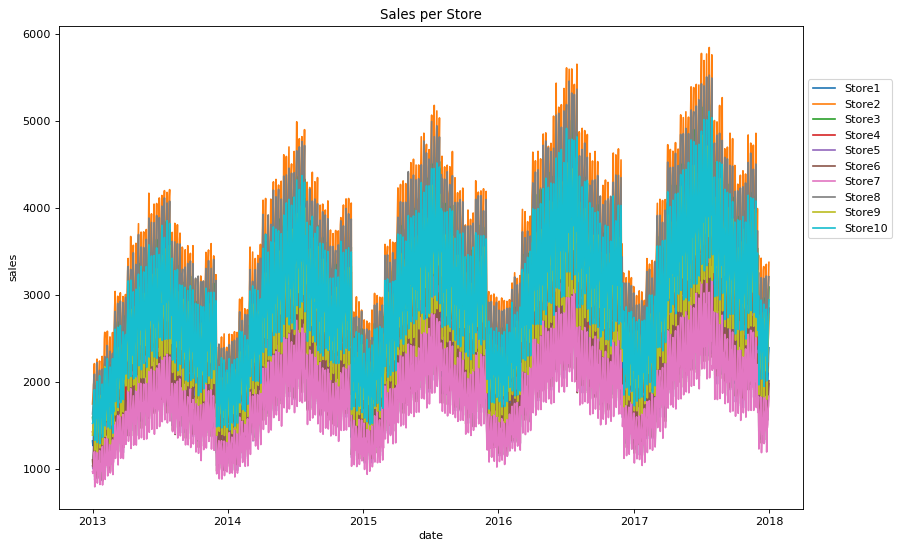

In [11]:
labels = []
fig = plt.figure(figsize=(12, 8), dpi=80)
for store_idx in store_sales.store.unique():
    temp = store_sales[store_sales['store']==store_idx]
    labels.append('Store' + str(store_idx))
    sns.lineplot(data=temp, x=temp.date, y=temp.sales)
    plt.legend(labels=labels, bbox_to_anchor=(1, 0.9), loc='upper left', ncol=1)
plt.title('Sales per Store')
plt.show()
fig.savefig(plots+'/sales_per_store.png', dpi=fig.dpi)

## Item Specific Sales

In [12]:
item_sales = train.groupby(['item', 'date'], as_index=False)['sales'].sum()
item_sales

,item,date,sales
0,1,2013-01-01,133
1,1,2013-01-02,99
2,1,2013-01-03,127
3,1,2013-01-04,145
4,1,2013-01-05,149
...,...,...,...
91295,50,2017-12-27,511
91296,50,2017-12-28,587
91297,50,2017-12-29,596
91298,50,2017-12-30,612


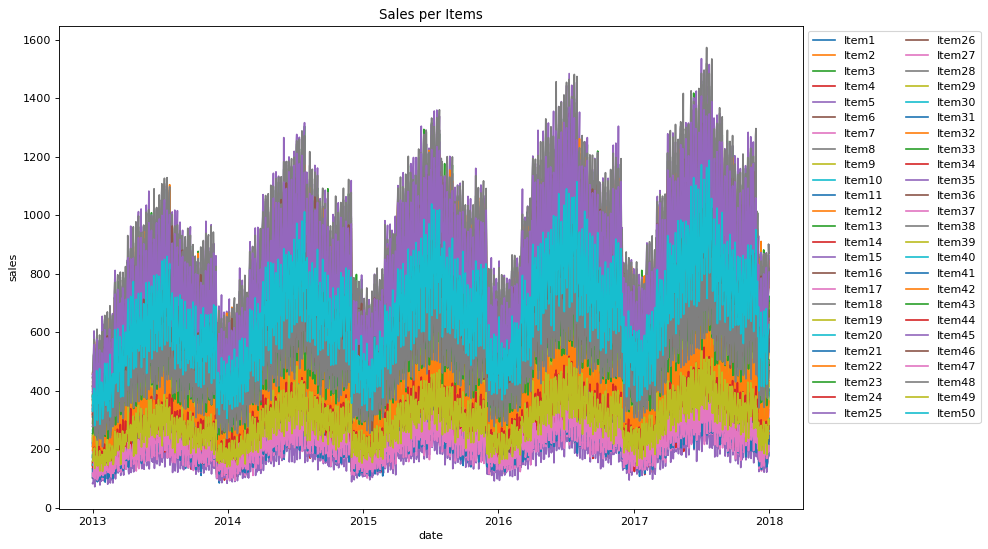

In [13]:
labels = []
fig = plt.figure(figsize=(12, 8), dpi=80)
for item_idx in item_sales.item.unique():
    temp = item_sales[item_sales['item']==item_idx]
    labels.append('Item' + str(item_idx))
    sns.lineplot(data=temp, x=temp.date, y=temp.sales)
    plt.legend(labels=labels, bbox_to_anchor=(1, 1), loc='upper left', ncol=2)
plt.title('Sales per Items')
plt.show()
fig.savefig(plots+'/sales_per_items.png', dpi=fig.dpi)